# Tarefa:
> Aplicar funções dentro da biblioteca prism.py que calcula o valor da anomalia gravitacional em cada ponto de observação considerando desde um retângulo a diversos retângulos. Para isso, foram montados exemplos demonstrados mais abaixo. <br>
<br>
Além disso, montar um caso onde se dá a liberdade para o usuário gerar a situação qualquer desejada por ele. <br>

In [1]:
# Importando bibliotecas do python
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
# path referente aa localizacao da pasta modules:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Importando bibliotecas extras
import prism

# Exemplos

# Considerações para os exemplos desenvolvidos:
>(1) O número de obsersavações é igual a 100 enquanto que o número de retângulos é um valor distindo entre 0 e 100; <br>
<br>
(2) Todos os retângulos utilizados nos exemplos não estão justapostos necessariamente; <br>
<br>
(3) Todos os retângulos utilizados nos exemplos apresentam as mesmas dimensões; <br>
<br>
(4) Todas as observações foram definidas com coordenadas z = 0.0, y = 0.0 e com x definido por um vetor gerado por np.linspace cujos parâmetros foram fornecidos na sua criação; <br>
<br>
(5) Como a função log foi aplicada sobre os limites que definem os modelos de retângulos utilizados, adotou-se limites (xmin, xmax, zmin, zmax) diferentes de zero mas com valores próximos de zero (-0.1 ou 0.1, por exemplo) quando se quis tentar aproximar do mesmo.

In [4]:
# Coletando informações

nobs_ex = 100   # numero de observacoes

# Coletando os limites em x e z do levantamento sintetico em metros
zmin_ex = -0.1  # limite minimo em z do levantamento sintetico
zmax_ex = 3000.0  # limite maximo em z do levantamento sintetico
xmin_ex = 0.1   # limite minimo em x do levantamento sintetico
xmax_ex = 1000.0 # limite maximo em x do levantamento sintetico

In [5]:
# Gerando as coordenadas dos pontos de observacoes

xo_ex = np.linspace(xmin_ex, xmax_ex, 100)
yo_ex = xo_ex*0.0
zo_ex = np.zeros(100)

# Gerandos as coordenadas que definem os 4 vertices de 100 retangulos justapostos ao longo do levantamento sintetico

xmed = ( xo_ex[0] + xo_ex[1] ) / 2.0
x_prisma_ex = abs( xo_ex[0] - ( xmed ) ) # valor utilizado para se gerar retangulos justapostos e de mesmo tamanho

x_coord_ex = []
z_coord_ex = []
for i in range (nobs_ex):
    x_coord_ex.append([xo_ex[i] - x_prisma_ex, xo_ex[i] + x_prisma_ex, xo_ex[i] + x_prisma_ex, \
                       xo_ex[i] - x_prisma_ex, xo_ex[i] - x_prisma_ex])
    
    z_coord_ex.append([zmin_ex, zmin_ex, zmax_ex, zmax_ex, zmin_ex])

Extensão de um retangulo no eixo z: 10.1 m
Extensão de um retangulo no eixo x: 3000.1 m


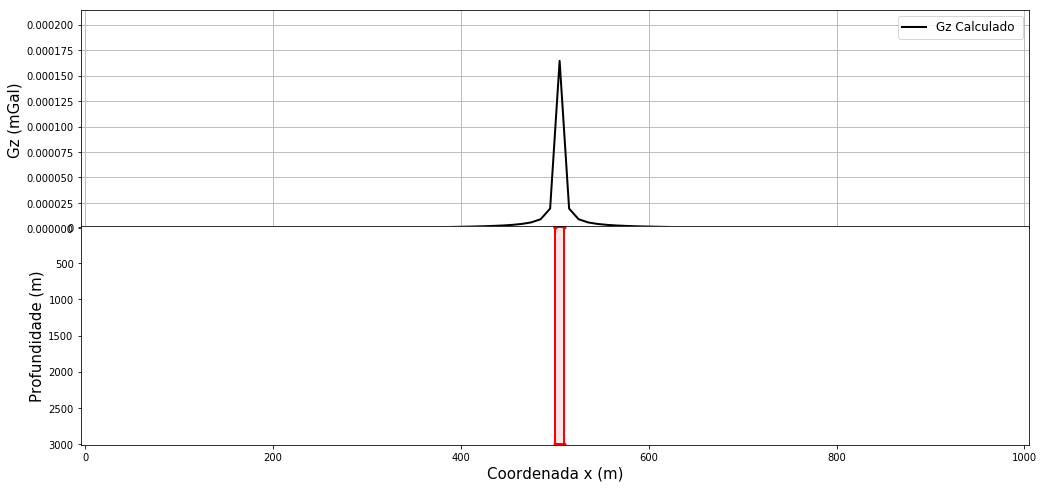

In [6]:
# Caso 1

# Selecionando o retangulo utilizado
index_total_ex = [50] # indice do retangulo utilizado

# Calculando os componentes gravitacionais

model_ex = [x_coord_ex[index_total_ex[0]][0], x_coord_ex[index_total_ex[0]][1], 0.001, 0.002, \
            z_coord_ex[index_total_ex[0]][0], z_coord_ex[index_total_ex[0]][2]] # limites do retangulo

gx1 = prism.prism_gx(xo_ex, yo_ex, zo_ex, model_ex, 2.67)
gy1 = prism.prism_gy(xo_ex, yo_ex, zo_ex, model_ex, 2.67)
gz1 = prism.prism_gz(xo_ex, yo_ex, zo_ex, model_ex, 2.67)

########################################################################################################################  
####################################################### PLOTAGEM #######################################################
########################################################################################################################
ext_x_ex = xo_ex[1] - xo_ex[0]
ext_z_ex = zmax_ex - zmin_ex
print('Extensão de um retangulo no eixo z:', ext_x_ex, 'm')
print('Extensão de um retangulo no eixo x:', ext_z_ex, 'm')

figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

ax1.plot(xo_ex, gz1, 'k-', label='Gz Calculado ', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.label_outer()
ax1.set_xlim(xo_ex[0] - x_prisma_ex, xo_ex[99] + x_prisma_ex)
ax1.set_ylim(0, max(gz1) + 0.00005)

for i in index_total_ex:
    ax2.plot(x_coord_ex[i], z_coord_ex[i], ".-r", linewidth=2)

    ax2.fill_between(x_coord_ex[i], z_coord_ex[i], facecolor='red', alpha=0.1)

ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_ylim(zmin_ex - 10, zmax_ex + 10)
ax2.set_xlabel('Coordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.show( )

Extensão de um retangulo no eixo z: 10.1 m
Extensão de um retangulo no eixo x: 3000.1 m


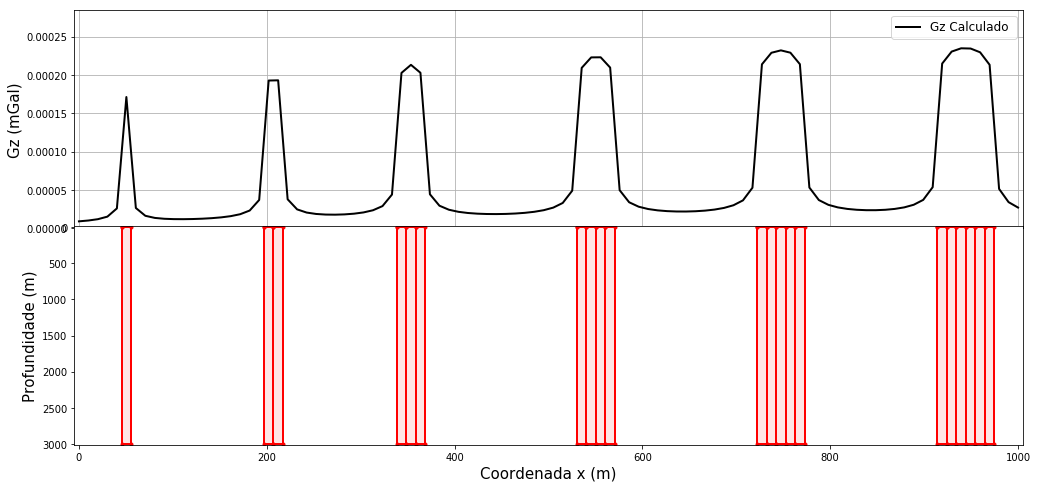

In [7]:
# Caso 2

# Gerando retangulos
index_total_ex = [5, 20, 21, 34, 35, 36, 53, 54, 55, 56, 72, 73, 74, 75, 76, \
                  91, 92, 93, 94, 95, 96] # indices dos retangulos utilizados

# Calculando os componentes gravitacionais
gx2 = 0
gy2 = 0
gz2 = 0
for i in index_total_ex:
    
    model_ex = [x_coord_ex[i][0], x_coord_ex[i][1], 0.001, 0.002, \
                z_coord_ex[i][0], z_coord_ex[i][2]] # limites do retangulo
    
    gx2 += prism.prism_gx(xo_ex, yo_ex, zo_ex, model_ex, 2.67)
    gy2 += prism.prism_gy(xo_ex, yo_ex, zo_ex, model_ex, 2.67)
    gz2 += prism.prism_gz(xo_ex, yo_ex, zo_ex, model_ex, 2.67)

########################################################################################################################  
####################################################### PLOTAGEM #######################################################
########################################################################################################################
ext_x_ex = xo_ex[1] - xo_ex[0]
ext_z_ex = zmax_ex - zmin_ex
print('Extensão de um retangulo no eixo z:', ext_x_ex, 'm')
print('Extensão de um retangulo no eixo x:', ext_z_ex, 'm')

figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

ax1.plot(xo_ex, gz2, 'k-', label='Gz Calculado ', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.label_outer()
ax1.set_xlim(xo_ex[0] - x_prisma_ex, xo_ex[99] + x_prisma_ex)
ax1.set_ylim(0, max(gz2) + 0.00005)

for i in index_total_ex:
    ax2.plot(x_coord_ex[i], z_coord_ex[i], ".-r", linewidth=2)

    ax2.fill_between(x_coord_ex[i], z_coord_ex[i], facecolor='red', alpha=0.1)

ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_ylim(zmin_ex - 10, zmax_ex + 10)
ax2.set_xlabel('Coordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.show( )

Extensão de um retangulo no eixo z: 10.1 m
Extensão de um retangulo no eixo x: 3000.1 m


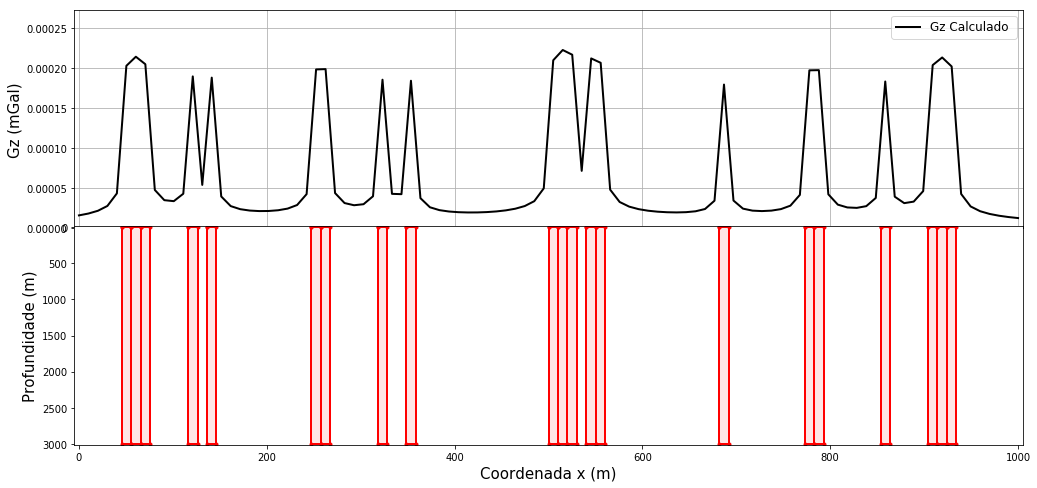

In [8]:
# Caso 3

# Gerando retangulos
index_total_ex = [5, 6, 7, 12, 14, 25, 26, 32, 35, 50, \
               51, 52, 54, 55, 68, 77, 78, 85, 90, 91, 92] # indices dos retangulos utilizados

# Calculando os componentes gravitacionais
gx3 = 0
gy3 = 0
gz3 = 0
for i in index_total_ex:
    
    model_ex = [x_coord_ex[i][0], x_coord_ex[i][1], 0.001, 0.002, \
                z_coord_ex[i][0], z_coord_ex[i][2]] # limites do retangulo
    
    gx3 += prism.prism_gx(xo_ex, yo_ex, zo_ex, model_ex, 2.67)
    gy3 += prism.prism_gy(xo_ex, yo_ex, zo_ex, model_ex, 2.67)
    gz3 += prism.prism_gz(xo_ex, yo_ex, zo_ex, model_ex, 2.67)

########################################################################################################################  
####################################################### PLOTAGEM #######################################################
########################################################################################################################
ext_x_ex = xo_ex[1] - xo_ex[0]
ext_z_ex = zmax_ex - zmin_ex
print('Extensão de um retangulo no eixo z:', ext_x_ex, 'm')
print('Extensão de um retangulo no eixo x:', ext_z_ex, 'm')

figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

ax1.plot(xo_ex, gz3, 'k-', label='Gz Calculado ', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.label_outer()
ax1.set_xlim(xo_ex[0] - x_prisma_ex, xo_ex[99] + x_prisma_ex)
ax1.set_ylim(0, max(gz3) + 0.00005)

for i in index_total_ex:
    ax2.plot(x_coord_ex[i], z_coord_ex[i], ".-r", linewidth=2)

    ax2.fill_between(x_coord_ex[i], z_coord_ex[i], facecolor='red', alpha=0.1)

ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_ylim(zmin_ex - 10, zmax_ex + 10)
ax2.set_xlabel('Coordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.show( )

# Espaço teste para o usuário

# Consideração para o usuário desenvolver seu caso:
> Inicialmente, utilizou-se as mesmas considerações dos exemplos acima mas o usuário tem liberdade para ajustar da forma que for com o objetivo de representar melhor o caso que deseja.

In [9]:
# Coletando informacoes

nobs = 100   # numero de observacoes

# Coletando os limites em x e z do levantamento sintetico em metros
zmin = -0.1  # limite minimo em z do levantamento sintetico
zmax = 3000.0  # limite maximo em z do levantamento sintetico
xmin = 0.1   # limite minimo em x do levantamento sintetico
xmax = 1000.0 # limite maximo em x do levantamento sintetico

In [10]:
# Gerando as coordenadas dos pontos de observacoes

xo = np.linspace(xmin, xmax, nobs)
yo = xo*0.0
zo = np.zeros(nobs)

# Gerandos as coordenadas que definem os 4 vertices de 100 retangulos justapostos ao longo do levantamento sintetico

xmed = ( xo[0] + xo[1] ) / 2.0
x_prisma = abs( xo[0] - ( xmed ) ) # valor utilizado para se gerar retangulos justapostos e de mesmo tamanho

x_coord = []
z_coord = []
for i in range (nobs):
    x_coord.append([xo[i] - x_prisma, xo[i] + x_prisma, xo[i] + x_prisma, xo[i] - x_prisma, xo[i] - x_prisma])
    
    z_coord.append([zmin, zmin, zmax, zmax, zmin])

Extensão de um retangulo no eixo z: 10.1 m
Extensão de um retangulo no eixo x: 3000.1 m


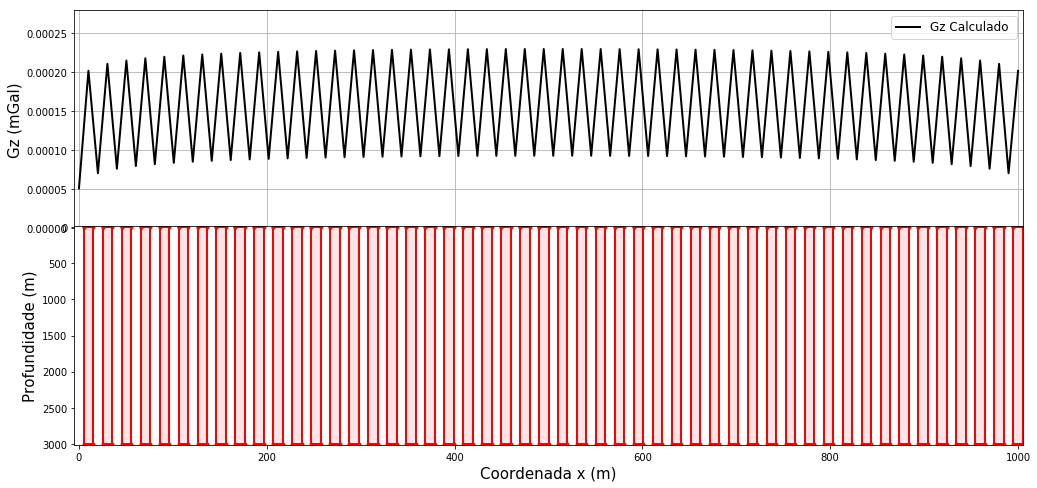

In [11]:
# Gerando retangulos
index_total = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, \
               27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, \
               51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, \
               75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99] # indices dos retangulos utilizados

# Calculando os componentes gravitacionais
gx = 0
gy = 0
gz = 0
for i in index_total:
    
    model = [x_coord[i][0], x_coord[i][1], 0.001, 0.002, \
             z_coord[i][0], z_coord[i][2]] # limites do retangulo
    
    gx += prism.prism_gx(xo, yo, zo, model, 2.67)
    gy += prism.prism_gy(xo, yo, zo, model, 2.67)
    gz += prism.prism_gz(xo, yo, zo, model, 2.67)

########################################################################################################################  
####################################################### PLOTAGEM #######################################################
########################################################################################################################
ext_x = xo[1] - xo[0]
ext_z = zmax - zmin
print('Extensão de um retangulo no eixo z:', ext_x, 'm')
print('Extensão de um retangulo no eixo x:', ext_z, 'm')

figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

ax1.plot(xo, gz, 'k-', label='Gz Calculado ', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.label_outer()
ax1.set_xlim(xo[0] - x_prisma, xo[99] + x_prisma)
ax1.set_ylim(0, max(gz) + 0.00005)

for i in index_total:
    ax2.plot(x_coord[i], z_coord[i], ".-r", linewidth=2)

    ax2.fill_between(x_coord[i], z_coord[i], facecolor='red', alpha=0.1)

ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_ylim(zmin - 10, zmax + 10)
ax2.set_xlabel('Coordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.show( )